# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import librosa as lb
import soundfile as sf
import os

# Load Dataset

### Deskripsi Dataset

Source: https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database?resource=download

Berisikan 920 rekaman audio (10s to 90s). Diambil dari 126 pasien. Total 5.5 jam rekaman berisikan 6898 siklus pernapasan.
1864 mengandung crackles, 886 mengandung wheezes dan 506 mengandung keduanya.
Data berisikan suara pernapasan jernih dan bernoise untuk mensimulasikan kondisi nyata.
Umur dari pasien bervariasi.

Dataset berisikan:
- 920 .wav sound files
- 920 anotasi .txt files
- Text file berisikan diagnosis setiap pasien
- Text file menjelaskan format penamaan rekaman
- Text file berisikan informasi demografis setiap pasien

Terdapat 6 fitur dalam demografik:
- Patient number (101-226)
- Age
- Sex
- Adult BMI (kg/m2)
- Child Weight (kg)
- Child Height (cm)

### Data Pasien

In [2]:
data_pasien= pd.read_csv(r"G:\Documents\Udayana\TA\Dataset Suara Paru Kaggle\Respiratory_Sound_Database\patient_diagnosis.csv",names=['pid','diagnosa'])
data_pasien.head()

,pid,diagnosa
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


<Axes: xlabel='count', ylabel='diagnosa'>

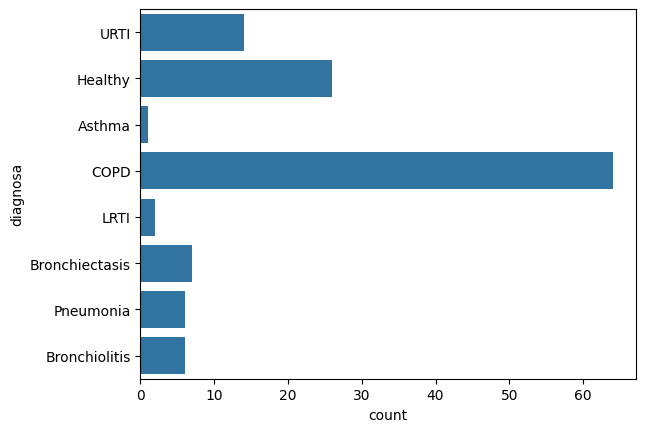

In [5]:
sns.countplot(data_pasien.diagnosa)

# Pre-processing

### Anotasi Rekaman

awal siklus pernapasan (detik), akhir siklus pernapasan (detik), crackles (1/0), wheezes (1/0)

In [7]:
df=pd.read_csv(r"G:\Documents\Udayana\TA\Dataset Suara Paru Kaggle\Respiratory_Sound_Database\audio_and_txt_files\103_2b2_Ar_mc_LittC2SE.txt",sep='\t')
df.head()

,0.364,3.25,0,1
0,3.250,6.636,0,0
1,6.636,11.179,0,1
2,11.179,14.250,0,1
3,14.250,16.993,0,1
4,16.993,19.979,0,0


Menggabungkan semua anotasi rekaman menjadi dataset

In [3]:
path="G:\\Documents\\Udayana\\TA\\Dataset Suara Paru Kaggle\\Respiratory_Sound_Database\\audio_and_txt_files\\"
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:5]

['101_1b1_Al_sc_Meditron',
 '101_1b1_Pr_sc_Meditron',
 '102_1b1_Ar_sc_Meditron',
 '103_2b2_Ar_mc_LittC2SE',
 '104_1b1_Al_sc_Litt3200']

### Nama File Rekaman

In [4]:
def getNamaRekaman(file):
    return file.split('_')

In [5]:
getNamaRekaman('103_2b2_Ar_mc_LittC2SE')

['103', '2b2', 'Ar', 'mc', 'LittC2SE']

### Gabungan anotasi dan nama file rekaman

In [ ]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['awal','akhir','crackles','wheezes'])
    name_data=getNamaRekaman(file)
    data['pid']=name_data[0]
    data['mode']=name_data[-2]
    data['namafile']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,awal,akhir,crackles,wheezes,pid,mode,namafile
0,0.036,0.579,0,0,101,sc,101_1b1_Al_sc_Meditron
1,0.579,2.450,0,0,101,sc,101_1b1_Al_sc_Meditron
2,2.450,3.893,0,0,101,sc,101_1b1_Al_sc_Meditron
3,3.893,5.793,0,0,101,sc,101_1b1_Al_sc_Meditron
4,5.793,7.521,0,0,101,sc,101_1b1_Al_sc_Meditron


In [36]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   awal      6898 non-null   float64
 1   akhir     6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   pid       6898 non-null   int32  
 5   mode      6898 non-null   object 
 6   namafile  6898 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 404.2+ KB


### Gabungan data_pasien dan files_df

Data dari 6898 siklus pernapasan

In [51]:
data_pasien.pid=data_pasien.pid.astype('int32')
files_df.pid=files_df.pid.astype('int32')
data=pd.merge(files_df,data_pasien,on='pid')
data

,awal,akhir,crackles,wheezes,pid,mode,namafile,diagnosa
0,0.036,0.579,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
1,0.579,2.450,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
2,2.450,3.893,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
3,3.893,5.793,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
4,5.793,7.521,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
...,...,...,...,...,...,...,...,...
6893,11.721,13.693,1,0,226,sc,226_1b1_Pl_sc_LittC2SE,Pneumonia
6894,13.693,15.536,0,0,226,sc,226_1b1_Pl_sc_LittC2SE,Pneumonia
6895,15.536,17.493,0,0,226,sc,226_1b1_Pl_sc_LittC2SE,Pneumonia
6896,17.493,19.436,1,0,226,sc,226_1b1_Pl_sc_LittC2SE,Pneumonia


In [53]:
os.makedirs('csv_data')
data.to_csv('csv_data/data.csv',index=False)

# Preparing Audio Files

Mengambil bagian dari file audio berisikan siklus pernapasan sebelumnya berdasarkan awal dan akhir dari setiap siklusnya dari dataframe data

- raw_data=numpy array dari audio
- sr=sampling_rate

### Visualisasi lama siklus pernapasan

<Axes: xlabel='None', ylabel='pid'>

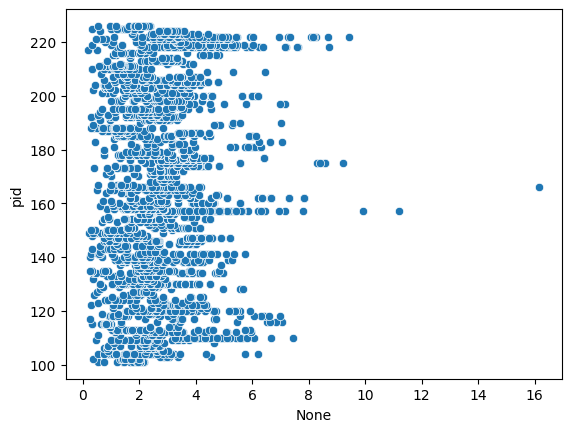

In [42]:
sns.scatterplot(x=(data.akhir-data.awal), y=data.pid)

<Axes: ylabel='None'>

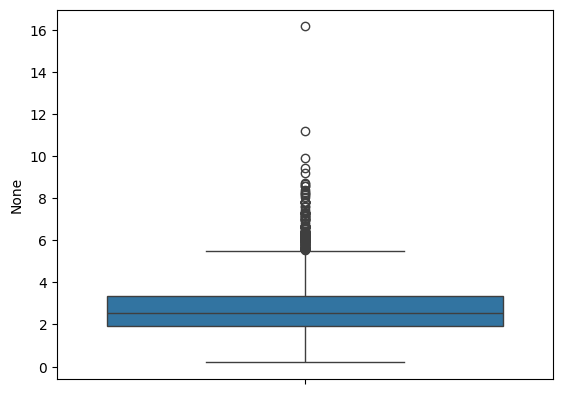

In [43]:
sns.boxplot(y=(data.akhir-data.awal))

Berdasarkan kedua visualisasi, median dari lama siklus berada pada rentang 2-4 detik, dengan kuartil 3 berada pada ~6 detik.

### Pemisahan audio menjadi per siklus pernapasan

Untuk menyamakan durasi siklus pernapasan menjadi 6 detik, rekaman audio yang lebih pendek akan ditambahkan zero pad, sedangkan yang lebih panjang akan dipotong.

In [ ]:
def getAudio(raw_data,awal,akhir,sr=22050):
    max_ind = len(raw_data) 
    awal_ind = min(int(awal * sr), max_ind)
    akhir_ind = min(int(akhir * sr), max_ind)
    return raw_data[awal_ind: akhir_ind]

In [ ]:
os.makedirs('audio_6secs')

In [ ]:
i,c=0,0
for index,row in data.iterrows():
    maxLen=6
    awal=row['awal']
    akhir=row['akhir']
    namafile=row['namafile']
    
    #If len > maxLen , change it to maxLen
    if akhir-awal>maxLen:
        akhir=awal+maxLen
    
    audio_loc=path + namafile + '.wav'
    
    if index > 0:
        #check if more cycles exits for same patient if so then add i to change filename
        if data.iloc[index-1]['namafile']==namafile:
            i+=1
        else:
            i=0
    namafile= namafile + '_' + str(i) + '.wav'
    
    save_path='audio_6secs/' + namafile
    c+=1
    
    audioArr,sampleRate=lb.load(audio_loc)
    audio=getAudio(audioArr,awal,akhir,sampleRate)
    
    #pad audio if pureSample len < max_len
    reqLen=6*sampleRate
    padded_data = lb.util.pad_center(audio, size=reqLen)
    
    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total audio yang diproses: ',c)

Total audio yang diproses:  6898


lanjut ke part 2 hehehe